In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas_profiling as pp
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Load the dataset 

In [2]:
df=pd.read_csv('blogtext.csv')

In [3]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [4]:
df.shape

(681284, 7)

In [5]:
df.sample(5)


,id,gender,age,topic,sign,date,text
381019,3751017,female,15,indUnk,Leo,"28,June,2004",Ohmygod! I hate VCR/DVD Players!! *screams...
368003,3350388,male,17,indUnk,Pisces,"29,June,2004",Monday (Mina's Birthday) Boring weekend...
350699,3745397,male,15,indUnk,Virgo,"09,July,2004","How's it going everyone? Uh huh, ye..."
239617,449628,male,34,indUnk,Aries,"12,July,2003",Update on the 'Journey Inside My...
121785,3524671,female,23,Government,Aquarius,"30,June,2004",reached school at 0900 again =( maths w...


In [6]:
df.head(10000)


,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
...,...,...,...,...,...,...,...
9995,1705136,female,25,indUnk,Pisces,"19,May,2004",take me home with you forever where I ...
9996,1705136,female,25,indUnk,Pisces,"23,June,2004",seductive secretness behind doors warn...
9997,1705136,female,25,indUnk,Pisces,"21,June,2004",For being so kind to me when I need yo...
9998,1705136,female,25,indUnk,Pisces,"09,June,2004",blurry outside sounds as people mingle...


As the dataset is large, use fewer rows. Check what is working well on your machine and decide accordingly

In [7]:
df=pd.read_csv('blogtext.csv',nrows=100000)

In [8]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [9]:
df.tail()

,id,gender,age,topic,sign,date,text
99995,1709399,male,27,Student,Virgo,"18,September,2003",THE HINDU - 125 YEARS ...
99996,1709399,male,27,Student,Virgo,"16,September,2003",DILBERT & IIT-ans ...
99997,1709399,male,27,Student,Virgo,"12,September,2003",Case Study : How HP won $3 billion...
99998,1709399,male,27,Student,Virgo,"09,September,2003",Championing Chennai ...
99999,1709399,male,27,Student,Virgo,"05,September,2003",WEEKEND It...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      100000 non-null  int64 
 1   gender  100000 non-null  object
 2   age     100000 non-null  int64 
 3   topic   100000 non-null  object
 4   sign    100000 non-null  object
 5   date    100000 non-null  object
 6   text    100000 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.3+ MB


In [11]:
df.gender.value_counts()

male      53358
female    46642
Name: gender, dtype: int64

In [12]:
df.isna().sum()


id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [13]:
df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

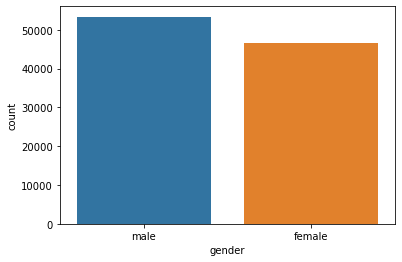

In [14]:
sns.countplot(x='gender',data=df)


<AxesSubplot:xlabel='sign', ylabel='count'>

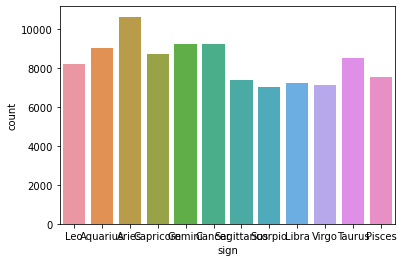

In [15]:
sns.countplot(x='sign',data=df)


# 2. Preprocess rows of the “text” column
# a. Remove unwanted characters

# b. Convert text to lowercase

# c. Remove unwanted spaces

# d. Remove stopwords

In [16]:
# remove unwanted characters other than alphanumeric
pattern = "[^\w ]"
df.text = df.text.apply(lambda s : re.sub(pattern,"",s))

In [17]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",Info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members Drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoos Toolbar I can no...


In [18]:
#coverting text to lower
df.text = df.text.apply(lambda s: s.lower())


In [19]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and ...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can no...


In [20]:
#removing unwanted spaces
df.text = df.text.apply(lambda s: s.strip())

In [21]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info has been found 100 pages and 45 mb of pd...
1,2059027,male,15,Student,Leo,"13,May,2004",these are the team members drewes van der la...
2,2059027,male,15,Student,Leo,"12,May,2004",in het kader van kernfusie op aarde maak je e...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks to yahoos toolbar i can now capture the...


In [22]:
#remove stopwords

stopwords=set(stopwords.words('english'))


In [23]:
df.text = df.text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )


In [24]:
df.head()


,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004",info found 100 pages 45 mb pdf files wait unti...
1,2059027,male,15,Student,Leo,"13,May,2004",team members drewes van der laag urllink mail ...
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoos toolbar capture urls popupswhich...


In [25]:
# dropping id and date columns
df.drop(labels=['id','date'], axis=1,inplace=True)

In [26]:
df.head()


,gender,age,topic,sign,text
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing testing
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...


# As we want to make this into a multi-label classification problem,we should merge all the label columns  together, so that we have all the labels together for a particular sentence 

In [27]:
df['labels'] = df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [28]:
df.head()

,gender,age,topic,sign,text,labels
0,male,15,Student,Leo,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


# Dropping  gender,age,topic & sign as they are already merged to labels column


In [29]:
df.drop(columns=['gender','age','topic','sign'], axis=1, inplace=True)

In [30]:
df.head()

,text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


# 4. Separate features and labels, and split the data into training and testing


In [31]:
X= df.text
y = df.labels

In [32]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)


In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(80000,)
(80000,)
(20000,)
(20000,)


In [34]:
X_test


6448                      bird buries head mashed potatoes
50680    ok seriously ruined day like mad right wouldnt...
814      astro vs braves got back minute maid stadium d...
20354    greetings welcome first ever blog concept behi...
49224    walks door room always brightens perfect figur...
                               ...                        
47661    hey cool jo problem understandable sounds lots...
56256    last night went see new harry potter movie hon...
92555    urllink instant messages come bearing malice i...
36328    srajan gamers sections class 8th entered compu...
73345    monqiue got back together wasnt quite dramatic...
Name: text, Length: 20000, dtype: object

# 5. Vectorize the features
a. Create a Bag of Words using count vectorizer

i. Use ngram_range=(1, 2)

ii. Vectorize training and testing features

b. Print the term-document matrix



In [35]:
cvt = CountVectorizer(ngram_range=(1,2))


In [36]:
#Feed SMS data to CountVectorizer
cvt.fit(X_train)

#Check the vocablury size
len(cvt.vocabulary_)

4517090

In [37]:
cvt.get_feature_names()


['00',
 '00 damarcus',
 '00 damn',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 games',
 '00 laughed',
 '00 lil',
 '00 morning',
 '00 really',
 '00 silver',
 '00 sometimes',
 '00 soooooo',
 '00 sq',
 '00 tcr1',
 '00 tie',
 '00 uppercase_75_100',
 '00 watch',
 '00 well',
 '000',
 '000 address',
 '000 available',
 '000 best',
 '000 calories',
 '000 cheaper',
 '000 comptes',
 '000 could',
 '000 duration',
 '000 et',
 '000 first',
 '000 ft',
 '000 fulltime',
 '000 good',
 '000 heh',
 '000 leaving',
 '000 nothing',
 '000 odd',
 '000 people',
 '000 pounds',
 '000 rupees',
 '000 seats',
 '000 sec',
 '000 seems',
 '000 straight',
 '000 subject',
 '000 thats',
 '000 years',
 '000 yen',
 '0000',
 '0000 arent',
 '0000 blinking',
 '0000 hopefully',
 '0000 hrs',
 '0000 new',
 '0000 showed',
 '0000 still',
 '0000 subject',
 '000000',
 '000000 flickrframe',
 '000000 fontfamily',
 '000000 zero',
 '000000000000000000000000167',
 '000000000000000000000000167 grams',
 '000000000000000000000section',
 '0000

In [38]:
X_train_ct = cvt.transform(X_train)


In [39]:
type(X_train_ct)


scipy.sparse.csr.csr_matrix

In [40]:
X_train_ct


<80000x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 13894625 stored elements in Compressed Sparse Row format>

In [41]:
X_train_ct[0]


<1x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 483 stored elements in Compressed Sparse Row format>

In [42]:
X_test_ct = cvt.transform(X_test)


In [43]:
X_test_ct


<20000x4517090 sparse matrix of type '<class 'numpy.int64'>'
	with 2633973 stored elements in Compressed Sparse Row format>

In [44]:
cvt.get_feature_names()[:10]


['00',
 '00 damarcus',
 '00 damn',
 '00 doesnt',
 '00 dont',
 '00 draw',
 '00 games',
 '00 laughed',
 '00 lil',
 '00 morning']

In [45]:
print(X_train_ct)


  (0, 10607)	1
  (0, 10627)	1
  (0, 11033)	1
  (0, 11034)	1
  (0, 13953)	1
  (0, 13954)	1
  (0, 42119)	1
  (0, 42120)	1
  (0, 43719)	1
  (0, 43827)	1
  (0, 67010)	1
  (0, 67011)	1
  (0, 92180)	1
  (0, 92184)	1
  (0, 113011)	1
  (0, 113907)	1
  (0, 120596)	2
  (0, 123016)	2
  (0, 181859)	1
  (0, 181920)	1
  (0, 244805)	1
  (0, 244878)	1
  (0, 258494)	1
  (0, 258690)	1
  (0, 263762)	1
  :	:
  (79999, 489553)	1
  (79999, 490590)	1
  (79999, 685736)	1
  (79999, 686275)	1
  (79999, 987793)	1
  (79999, 990497)	1
  (79999, 1275446)	1
  (79999, 1664615)	1
  (79999, 1668927)	1
  (79999, 1934343)	1
  (79999, 1936464)	1
  (79999, 2334456)	1
  (79999, 2335872)	1
  (79999, 2680191)	1
  (79999, 2682769)	1
  (79999, 2689599)	1
  (79999, 2690051)	1
  (79999, 3250596)	1
  (79999, 3250640)	1
  (79999, 3892432)	1
  (79999, 3894880)	1
  (79999, 3948360)	1
  (79999, 3948560)	1
  (79999, 4052512)	1
  (79999, 4052642)	1


# 6.Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label. Check below image for reference 

In [46]:
label_counts=dict()

for labels in df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [47]:
label_counts

{'male': 53358,
 '15': 1,
 'Student': 22122,
 'Leo': 8230,
 '33': 1,
 'InvestmentBanking': 244,
 'Aquarius': 9050,
 'female': 46642,
 '14': 1,
 'indUnk': 33097,
 'Aries': 10637,
 '25': 1,
 'Capricorn': 8723,
 '17': 1,
 'Gemini': 9225,
 '23': 1,
 'Non-Profit': 1326,
 'Cancer': 9253,
 'Banking': 354,
 '37': 1,
 'Sagittarius': 7366,
 '26': 1,
 '24': 1,
 'Scorpio': 7049,
 '27': 1,
 'Education': 5553,
 '45': 1,
 'Engineering': 2332,
 'Libra': 7250,
 'Science': 1090,
 '34': 1,
 '41': 1,
 'Communications-Media': 2830,
 'BusinessServices': 626,
 'Sports-Recreation': 406,
 'Virgo': 7134,
 'Taurus': 8530,
 'Arts': 5031,
 'Pisces': 7553,
 '44': 1,
 '16': 1,
 'Internet': 2251,
 'Museums-Libraries': 308,
 'Accounting': 528,
 '39': 1,
 '35': 1,
 'Technology': 8484,
 '36': 1,
 'Law': 360,
 '46': 1,
 'Consulting': 905,
 'Automotive': 124,
 '42': 1,
 'Religion': 1081,
 '13': 1,
 'Fashion': 1898,
 '38': 1,
 '43': 1,
 'Publishing': 1079,
 '40': 1,
 'Marketing': 726,
 'LawEnforcement-Security': 368,
 'Hum

# 7.Transform the labels 

In [48]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [49]:
y_train = binarizer.fit_transform(y_train)


In [50]:
y_test = binarizer.transform(y_test)


In [51]:
y_test


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

In [52]:
y_train


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

# 8 Choose a classifier

In [53]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [54]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)


In [55]:
model.fit(X_train_ct,y_train)


OneVsRestClassifier(estimator=LogisticRegression())

In [56]:
Ypred=model.predict(X_test_ct)


In [57]:
Ypred


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [58]:
y_test


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])

# 9. Fit the classifier, make predictions and get the accuracy a.Print the followingi.Accuracy scoreii.F1 scoreiii.Average precision scoreiv.Average recall scorev.Tip: Make sure you are familiar with all of them. How would you expect the things to work for the multi-label scenario? Read about micro/macro/weighted averaging


In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score



In [60]:
def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
    
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average recall score: MAcro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))
    

In [61]:
display_metrics_micro(y_test,Ypred)


Accuracy score:  0.10795
F1 score: Micro 0.4763842996467077
Average precision score: Micro 0.287872479055153
Average recall score: Micro 0.3472166666666667


In [62]:
display_metrics_macro(y_test,Ypred)


Accuracy score:  0.10795
F1 score: Macro 0.15609366831890287
Average recall score: MAcro 0.1035950241926018


In [63]:
display_metrics_weighted(y_test,Ypred)


Accuracy score:  0.10795
F1 score: weighted 0.4353681029257954
Average precision score: weighted 0.38891512325168553
Average recall score: weighted 0.3472166666666667


# 10.Print true label and predicted label for any five examples


In [65]:
preds = Ypred[:15]
actuals = y_test[:15]

In [66]:
five_actual = binarizer.inverse_transform(actuals)
five_actual

[('Aries', 'Fashion', 'male'),
 ('Libra', 'Student', 'male'),
 ('Sagittarius', 'indUnk', 'male'),
 ('Aquarius', 'indUnk', 'male'),
 ('Cancer', 'Student', 'male'),
 ('Pisces', 'Transportation', 'male'),
 ('Arts', 'Capricorn', 'female'),
 ('Capricorn', 'Student', 'male'),
 ('Cancer', 'Religion', 'male'),
 ('Libra', 'indUnk', 'male'),
 ('Aquarius', 'female', 'indUnk'),
 ('Capricorn', 'Consulting', 'female'),
 ('Virgo', 'indUnk', 'male'),
 ('Internet', 'Sagittarius', 'male'),
 ('Scorpio', 'Technology', 'male')]

In [67]:
five_pred = binarizer.inverse_transform(preds)
five_pred

[(),
 ('Student', 'female'),
 ('female',),
 ('male',),
 ('Cancer', 'female'),
 ('Pisces', 'Transportation', 'male'),
 ('female',),
 ('Student',),
 ('Religion', 'female'),
 ('male',),
 ('female',),
 ('Consulting', 'female'),
 ('female',),
 ('male',),
 ('Scorpio', 'male')]

# Print true label and predicted label for any five examples


In [70]:
print(binarizer.inverse_transform(Ypred)[877])
print(binarizer.inverse_transform(y_test)[877])


('Student', 'Virgo', 'male')
('Student', 'Virgo', 'male')


In [71]:
print(binarizer.inverse_transform(Ypred)[514])
print(binarizer.inverse_transform(y_test)[514])

()
('Libra', 'female', 'indUnk')


In [72]:
print(binarizer.inverse_transform(Ypred)[99])
print(binarizer.inverse_transform(y_test)[99])

('Cancer', 'Education', 'Pisces', 'male')
('Education', 'Pisces', 'male')


In [73]:
print(binarizer.inverse_transform(Ypred)[499])
print(binarizer.inverse_transform(y_test)[499])

('male',)
('Pisces', 'Student', 'female')


In [74]:
print(binarizer.inverse_transform(Ypred)[699])
print(binarizer.inverse_transform(y_test)[699])

('Student', 'female')
('Libra', 'Student', 'male')


# Print true label and predicted label for any five examples


In [77]:
import random
j=[]
for i in range(5):
    j.append(random.randint(300,len(Ypred)))
   
print(j)

for k in j:    
    print(binarizer.inverse_transform(Ypred)[k])
    print(binarizer.inverse_transform(y_test)[k])
    

[15658, 2024, 11240, 4875, 9361]
('Student', 'male')
('Capricorn', 'Student', 'female')
('Gemini', 'indUnk', 'male')
('Gemini', 'indUnk', 'male')
()
('Scorpio', 'female', 'indUnk')
()
('Arts', 'Gemini', 'female')
()
('Cancer', 'Education', 'female')


In [78]:
Ypred_inversed = binarizer.inverse_transform(Ypred)
y_test_inversed = binarizer.inverse_transform(y_test)
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_ct[i],
        ','.join(y_test_inversed[i]),
        ','.join(Ypred_inversed[i])
    ))

Text:	  (0, 466872)	1
  (0, 584973)	1
  (0, 584975)	1
  (0, 1781828)	1
  (0, 2442107)	1
  (0, 2442126)	1
  (0, 3036818)	1
True labels:	Aries,Fashion,male
Predicted labels:	


Text:	  (0, 8711)	1
  (0, 9452)	1
  (0, 21144)	1
  (0, 67661)	1
  (0, 67771)	1
  (0, 74496)	1
  (0, 78471)	1
  (0, 120596)	2
  (0, 121772)	1
  (0, 126920)	1
  (0, 157801)	2
  (0, 157893)	1
  (0, 178920)	1
  (0, 182108)	1
  (0, 182417)	1
  (0, 183363)	2
  (0, 194027)	1
  (0, 202361)	5
  (0, 204077)	1
  (0, 205064)	1
  (0, 239970)	1
  (0, 240321)	1
  (0, 241441)	1
  (0, 241749)	1
  (0, 253541)	9
  :	:
  (0, 4449080)	1
  (0, 4449591)	1
  (0, 4449622)	1
  (0, 4450746)	3
  (0, 4451462)	1
  (0, 4451494)	1
  (0, 4452125)	1
  (0, 4456092)	2
  (0, 4456694)	1
  (0, 4463749)	2
  (0, 4464331)	2
  (0, 4469199)	1
  (0, 4469266)	1
  (0, 4471407)	1
  (0, 4490043)	1
  (0, 4490712)	1
  (0, 4497129)	1
  (0, 4497648)	1
  (0, 4499761)	2
  (0, 4500860)	1
  (0, 4501718)	1
  (0, 4503106)	1
  (0, 4503264)	1
  (0, 4505960)	1
  (0, 4506082)

# Use a linear classifier (LinearSVC is used in the following) of your choice, wrap it up in OneVsRestClassifier to train it on every label

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

def build_model_train(X_train, y_train, X_valid=None, y_valid=None, C=1.0, model='lr'):
    if model=='lr':
        model = LogisticRegression(C=C, penalty='l1', dual=False, solver='liblinear')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='svm':
        model = LinearSVC(C=C, penalty='l1', dual=False, loss='squared_hinge')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
    
    elif model=='nbayes':
        model = MultinomialNB(alpha=1.0)
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)
        
    elif model=='lda':
        model = LinearDiscriminantAnalysis(solver='svd')
        model = OneVsRestClassifier(model)
        model.fit(X_train, y_train)

    return model

In [81]:
models = ['lr','svm','nbayes']
for model in models:
    model = build_model_train(X_train_ct,y_train,model=model)
    model.fit(X_train_ct,y_train)
    Ypred=model.predict(X_test_ct)
    print("\n")
    print(f"**displaying  metrics for the mode {model}\n")
    display_metrics_micro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_macro(y_test,Ypred)
    print("\n")
    print("\n")
    display_metrics_weighted(y_test,Ypred)
    print("\n")
    print("\n")



**displaying  metrics for the mode OneVsRestClassifier(estimator=LogisticRegression(penalty='l1',
                                                 solver='liblinear'))

Accuracy score:  0.1499
F1 score: Micro 0.5056562422783967
Average precision score: Micro 0.3018112683377162
Average recall score: Micro 0.3922333333333333




Accuracy score:  0.1499
F1 score: Macro 0.22350051571303742
Average recall score: MAcro 0.16144529917147254




Accuracy score:  0.1499
F1 score: weighted 0.48588065431858224
Average precision score: weighted 0.40489539627875093
Average recall score: weighted 0.3922333333333333






**displaying  metrics for the mode OneVsRestClassifier(estimator=LinearSVC(dual=False, penalty='l1'))

Accuracy score:  0.13085
F1 score: Micro 0.472213176423029
Average precision score: Micro 0.27797150140834564
Average recall score: Micro 0.3504333333333333




Accuracy score:  0.13085
F1 score: Macro 0.22084044498378072
Average recall score: MAcro 0.15152692586573482




Accurac